Discussion 3: Working with Fogel and Engerman's Data

In [1]:
from datascience import Table
from datascience import *
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use("fivethirtyeight")
import numpy as np

We will explore a smaller version of the Fogel and Engerman dataset, focusing on:

/1/Creating a table and visualization for a common qualitative variable V15, Gender

/2/Creating a table and visualization for a common quantitative variable V4, Sales by Year 

One way to demonstrate the usefulness of these activities is to replicate the process with somewhat more involved variables. We look at two. Specifically, V40 is conceptually similar to V15, but tracks whether or not the sale was “guaranteed.” How would you make a table and visualization that depicts this in an appropriate manner? Sometimes the variable seems straight-forward, but presenting it requires some thought. What is an insightful way to depict the number of sales per year?; instead of annual figures, why not present biannual ones, or quinquennial (5 years) or decadal (10 years) figures?

/3/Creating a table and visualization for a very uncommon qualitative variable V17, Color

Sale records frequently included descriptions of color (listed below), raising a whole host of questions. One question is and how do we, today, know what was considered Griff in the 1800s? 

V17, skin color:
Value    Label 
1    Negro
2    Griff
3    Yellow
4    Mulatto
5    Copper
7    Light
8    Brown
9    Creole
11    Dark
12    American Negro
13    African Negro
14  Unknown
15  Not Recorded

Apparently, at the time, this implied a color lighter than that of those classified as Negro but darker than those classified as Mulatto; here's an article that covers some of this: http://www.uvm.edu/~psearls/johnson.html. Of course, such an answer only pushes the question back, how do we today know the rule for classifying some as Negro and others as Mulatto? These are difficult questions, very difficult questions, and we will discuss how to approach them from a historically minded perspective.


In [2]:
data = Table.read_table("https://github.com/data-8/history-connector/raw/gh-pages/Data1.csv")
data

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47
NO2,NB,2,1804,PG,VI,1,999,GA,9,999,1,1,350,1,11,4,0,9,99,9,99,9,99,9,99,9,99,9,99,9,99,9,99,0,1,9999,99,99,1,99,0,0,0,201,1,1
NO2,NB,3,1804,PG,BI,1,999,CO,1,999,1,1,1000,1,24,4,0,9,99,9,99,9,99,9,99,9,99,9,99,9,99,9,99,0,2,9999,2,99,1,99,0,0,0,503,1,2
NO2,NB,3,1804,P,LA,1,999,DC,9,999,1,1,450,2,25,1,0,9,99,9,99,9,99,9,99,9,99,9,99,9,99,9,99,0,2,210,10,99,2,42,0,0,0,503,1,3
NO2,NB,4,1804,PG,LA,9,999,CH,9,999,2,1,800,1,99,1,0,9,99,9,99,9,99,9,99,9,99,9,99,9,99,9,99,0,1,9999,99,99,2,99,0,0,0,503,2,4
NO2,NB,4,1804,PG,LA,9,999,CH,9,999,2,1,99999,1,99,1,0,9,99,9,99,9,99,9,99,9,99,9,99,9,99,9,99,0,1,9999,99,99,2,99,0,0,0,503,2,5
NO2,NB,10,1804,PG,PE,1,999,LE,9,999,1,1,400,2,20,1,0,9,99,9,99,9,99,9,99,9,99,9,99,9,99,9,99,0,1,9999,99,99,1,99,0,0,0,503,1,6
NO2,PP,1,1804,PG,GA,1,999,MO,9,999,1,1,750,1,22,1,0,9,99,9,99,9,99,9,99,9,99,9,99,9,99,9,99,0,2,9999,99,99,1,99,2,0,0,267,1,7
NO2,PP,1,1804,PG,PO,1,999,BO,1,999,1,1,500,2,21,1,0,9,99,9,99,9,99,9,99,9,99,9,99,9,99,9,99,0,1,9999,99,99,2,30,0,0,0,267,1,8
NO2,PP,2,1804,PG,ME,1,999,SE,2,ORL,2,1,900,1,18,1,0,9,99,9,99,9,99,9,99,9,99,9,99,9,99,9,99,0,1,9999,99,99,2,99,0,7,8,117,2,9
NO2,PP,2,1804,PG,ME,1,999,SE,2,ORL,2,1,99999,2,18,1,0,9,99,9,99,9,99,9,99,9,99,9,99,9,99,9,99,0,1,9999,99,99,2,99,0,7,8,117,2,10


/1/ Gender: The dataset has about 5,000 rows and over 40 variables, many of which are familiar to us from our last discussion. One pattern we noted was that men tended to be represented somewhat more frequently than women in sale records. We can see what pattern the records from New Orleans, a major hub in the slave trade, reveal.

We will do this in several steps:

In [3]:
#Selecting V15 from the entire dataset

V15_counts = data.group('V15')
V15_counts

V15,count
1,2539
2,2457
9,13


In [4]:
#Adding labels

gender_counts = V15_counts.with_column('Gender', ['Male', 'Female', 'Other'])
gender_counts

V15,count,Gender
1,2539,Male
2,2457,Female
9,13,Other


In [5]:
#Simplification

gender_counts = V15_counts.with_column('Gender', ['Male', 'Female', 'Other']).select(['Gender', 'count'])
gender_counts

Gender,count
Male,2539
Female,2457
Other,13


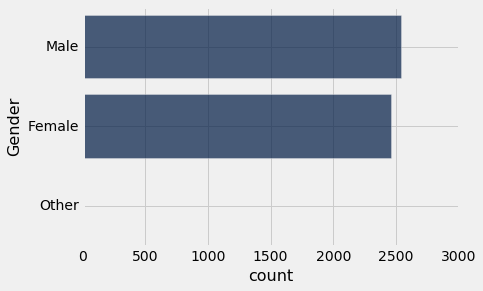

In [6]:
#Visualization
#Note, as motivation for these setps, compare: data.group('V15').barh('V15')#

gender_counts.barh('Gender')

/2/ Sales by year: This variable records the year of a sale, and there are no missing values. Histograms are a common way to present data, and we will use them quite a bit.

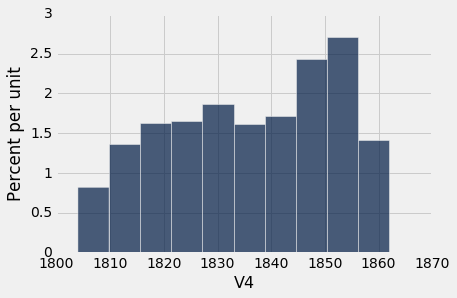

In [7]:
#Selecting V4, and presenting it visually

viz_salesbyyear = data.select(["V4"])
viz_salesbyyear.hist()

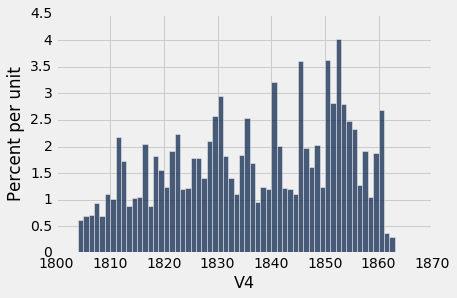

In [8]:
#A more detailed view complements the default settings /10 bins/
#Note that the dates cover the period 1804-1862

viz_salesbyyear = data.select(["V4"])
viz_salesbyyear.hist(bins=np.arange(1800, 1870, 1))

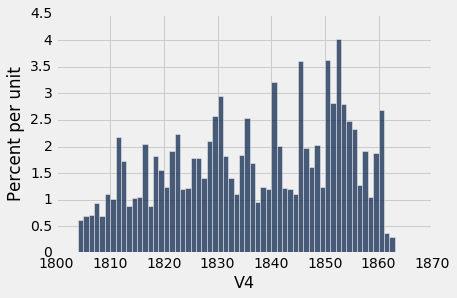

In [9]:
#Another way to present the information is in percent format

viz_salesbyyear = data.select(["V4"])
viz_salesbyyear.hist(bins=np.arange(1800, 1870, 1), normed=True)

/3/ Color: We can apply the approach from /1/, and note that the results raise a series of further questions. 

In [10]:
#Selecting V17 from the entire dataset; note the addition of 'show' 

V17_counts = data.group('V17')
V17_counts.show()

V17,count
1,3595
2,332
3,19
4,550
5,19
6,68
7,2
8,16
9,61
10,5


In [11]:
#Adding labels

color_counts = V17_counts.with_column('Color', ['Negro', 'Griff', 'Yellow', 'Mulatto', 'Copper', 'Black', 'Light', 
                                                'Brown', 'Creole', 'Quadroon', 'Dark Color', 'American Negro', 
                                                'African Negro', 'Unknown', 'Not Recorded'])
color_counts.show()

V17,count,Color
1,3595,Negro
2,332,Griff
3,19,Yellow
4,550,Mulatto
5,19,Copper
6,68,Black
7,2,Light
8,16,Brown
9,61,Creole
10,5,Quadroon


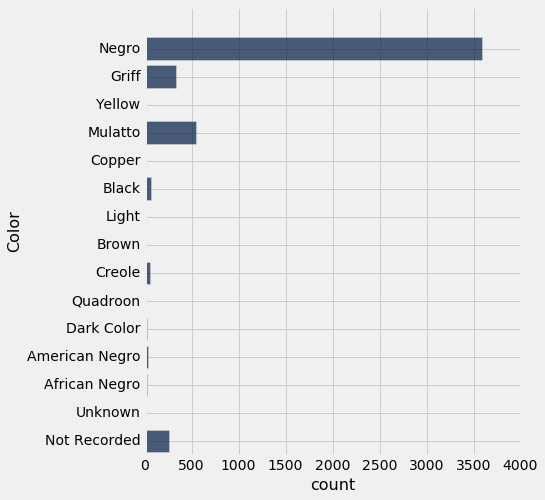

In [15]:
#Motivation for the next step, Simplification

color_counts.barh('Color')

In [13]:
#Simplification 

color_counts = V17_counts.with_column('Color', ['Negro', 'Griff', 'Yellow', 'Mulatto', 'Copper', 'Black', 'Light', 
                                                'Brown', 'Creole', 'Quadroon', 'Dark Color', 'American Negro', 
                                                'African Negro', 'Unknown', 'Not Recorded']).select(['Color','count'])
color_counts.show()

Color,count
Negro,3595
Griff,332
Yellow,19
Mulatto,550
Copper,19
Black,68
Light,2
Brown,16
Creole,61
Quadroon,5


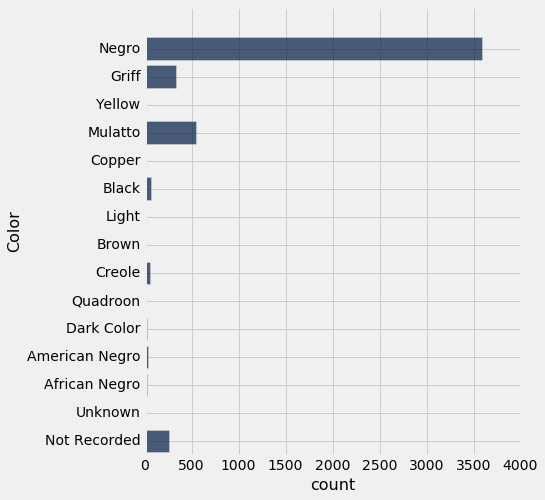

In [14]:
#Visualization

color_counts.barh('Color')

Replication of these results helps reinforce what we have covered. Look over the codebook, and see which variables interest you -- consider exploring the dataset for your project. For now, a suggestion:

/a/ Consider V40, and especially think about how would present the information about a "guarantee of sale," for instance in a newspaper or a textbook.

/b/ Consider V4, how many bins seem reasonable, what is lost and what is gained by moving away from the default settings?